In [2]:
import pandas as pd
mvc = pd.read_csv('nypd_mvc_2018.csv')

In [3]:
mvc.head()

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


Let's recap how to count missing values. We'll start by creating a dataframe with random null values

In [4]:
import numpy as np
data = np.random.choice([1.0,np.nan],size = (3,3), p = [.3,.7])
df = pd.DataFrame(data,columns = ['A','B','C'])
print(df)

    A    B   C
0 NaN  NaN NaN
1 NaN  NaN NaN
2 NaN  1.0 NaN


In [5]:
df.isnull().sum()

A    3
B    2
C    3
dtype: int64

In [6]:
null_counts = mvc.isnull().sum()
print(null_counts)

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64


### Verifying Total Columns

Let's calulate the percentage of null values in each column

In [7]:
null_counts_pct = null_counts / mvc.shape[0] * 100
print(null_counts_pct)

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64


We'll add both percentages to a dataframe to make it easier to compare

In [8]:
null_df = pd.DataFrame({'null_counts':null_counts,'null_pct': null_counts_pct})
#Transpose the dataframe
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


In [9]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


In [10]:
killed_col = []
for cols in mvc.columns:
    if 'killed' in cols:
        killed_col.append(cols)
        

In [11]:
null_df[killed_col]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


total_killed has 5 missing values. The technical name for filling in a missing value with with a replacement value is called `imputation`

In [12]:
killed = mvc[killed_cols].copy()

In [13]:
killed_manual_sum = killed.iloc[:,0:3].sum(axis = 1)

In [14]:
killed_mask = killed_manual_sum != killed['total_killed']

In [15]:
killed_non_eq = killed[killed_mask]

In [16]:
killed_mask.value_counts()

False    57858
True         6
dtype: int64

In [17]:
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


### Filled and Verifying the Killed and Injured Data

We categorize these into two categories 

1. Five rows where the total_killed is not equal to the sum of the other columns because the total value is missing
2. One row where the total_killed is less than the sum of the other column

series.mask() method is useful when you want to replace certain values in a series of a boolean mask. The syntax:

Series.mask(bool_mask, vals_to_replace)

In [18]:
fruits = pd.Series(['Apple','Banana','Banana'])

In [19]:
fruit_bool = fruits == 'Banana'

In [20]:
result = fruits.mask(fruit_bool, 'Pear')

In [21]:
result

0    Apple
1     Pear
2     Pear
dtype: object

In [22]:
nums = pd.Series(['one','two','three'])

In [23]:
result = fruits.mask(fruit_bool, nums)

In [24]:
result

0    Apple
1      two
2    three
dtype: object

In [26]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

In [27]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [28]:
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


### Instructions

We included the code to clean the killed columns. In addition, we've created an injured dataframe with just the injured columns and injured_manual_sum, a series manually summing the three individual injured columns.

1. Use Series.mask() to replace any null values from the total_injured column with their equivalents from the injured_manual_sum series.
2. Use Series.mask() to replace any numbers from total_injured that aren't equal to their equivalents in injured_manual_sum with np.nan.

In [29]:
injured = []
for col in mvc.columns:
    if 'injured' in col:
        injured.append(col)

In [30]:
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()

In [31]:
injured_manual_sum = injured.iloc[:,0:3].sum(axis = 1)

In [32]:
injured_null = injured['total_injured'].isnull()

In [33]:
injured['total_injured'] = injured['total_injured'].mask(injured_null, injured_manual_sum)

In [34]:
import numpy as np 
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

### Assigning the Corrected Data Back to the Main Dataframe

In [35]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


In [36]:
injured['total_injured'].isnull().sum()

21

For the total_killed column, the number of values has gone down from 5 to 1. For the total_injured column, the number of values has actually gone up — from 1 to 21. 

### Instructions
1. Assign the total_injured column from the injured dataframe to the same column in the mvc dataframe.
2. Assign the total_killed column from the killed dataframe to the same column in the mvc dataframe.

In [37]:
mvc['total_injured'] = injured['total_injured'] 

In [38]:
mvc['total_killed'] = killed['total_killed'] 

### Visualizing Missing Data with Plots

The function below uses seaborn.heatmap() to represent null values as light squares and non-null values as dark squares:

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

We'll display the first row as a table 

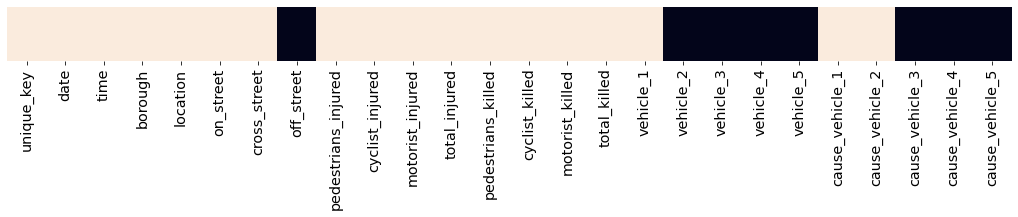

In [41]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [42]:
mvc.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


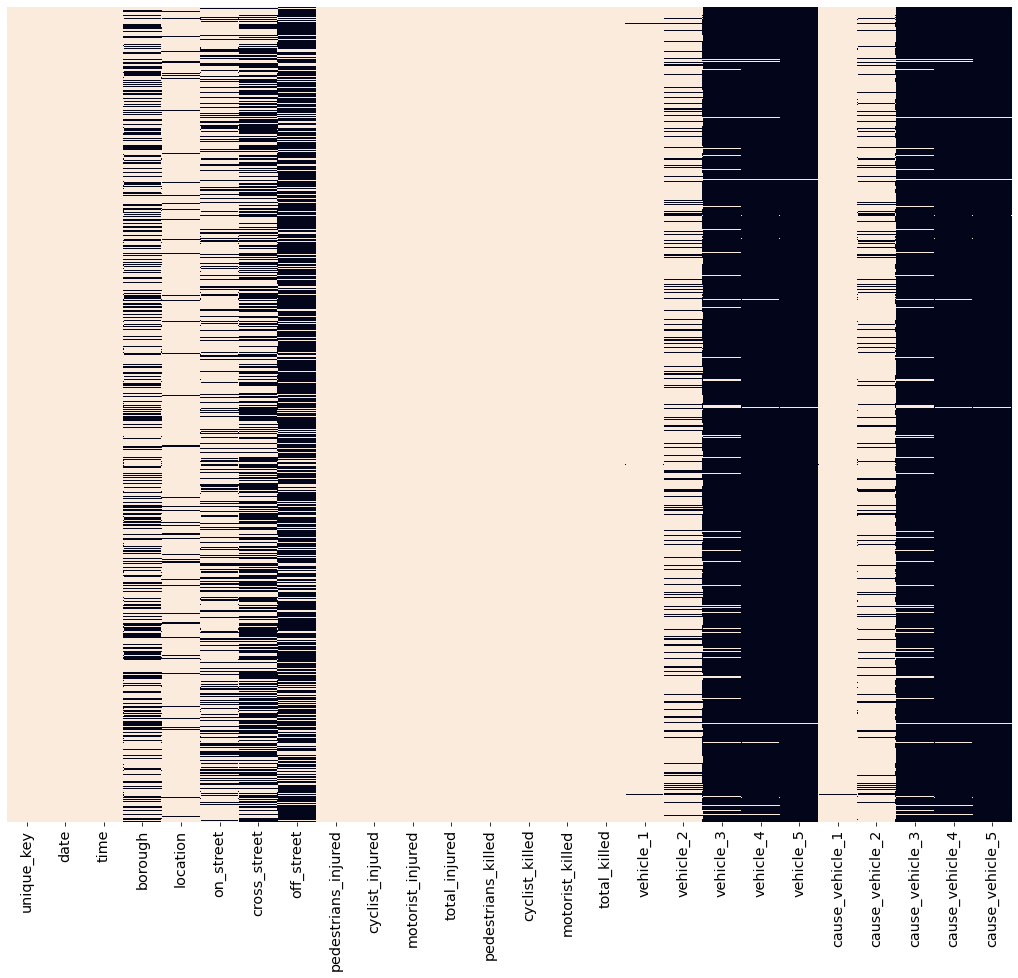

In [43]:
plot_null_matrix(mvc) 

We can make some immediate interpretations about our dataframe:

1. The first three columns have few to no missing values.
2. The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing values.
3. The next eight columns are the injury and killed columns we just cleaned, and only have a few missing values.
4. The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

Let's examine the pattern in the last 10 columns a little more closely. We can calculate the relationship between two sets of columns, known as correlation. To calculate this we use the dataframe.corr() method 

In [44]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


Each value is between  and , and represents the relationship between two columns. A number close to  or  represents a strong relationship, where a number in the middle (close to ) represents a weak relationship.
If you look closely, you can see a diagonal line of s going from top left to bottom right. These values represent each columns relationship with itself, which of course is a perfect relationship. The values on the top/right of this "line of s" mirror the values on the bottom/left of this line: The table actually repeats every value twice!
Correlation tables can be hard to interpret. We can convert our table into a plot which will make this a lot easier. Let's see what this plot looks like:

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')
    plt.show()

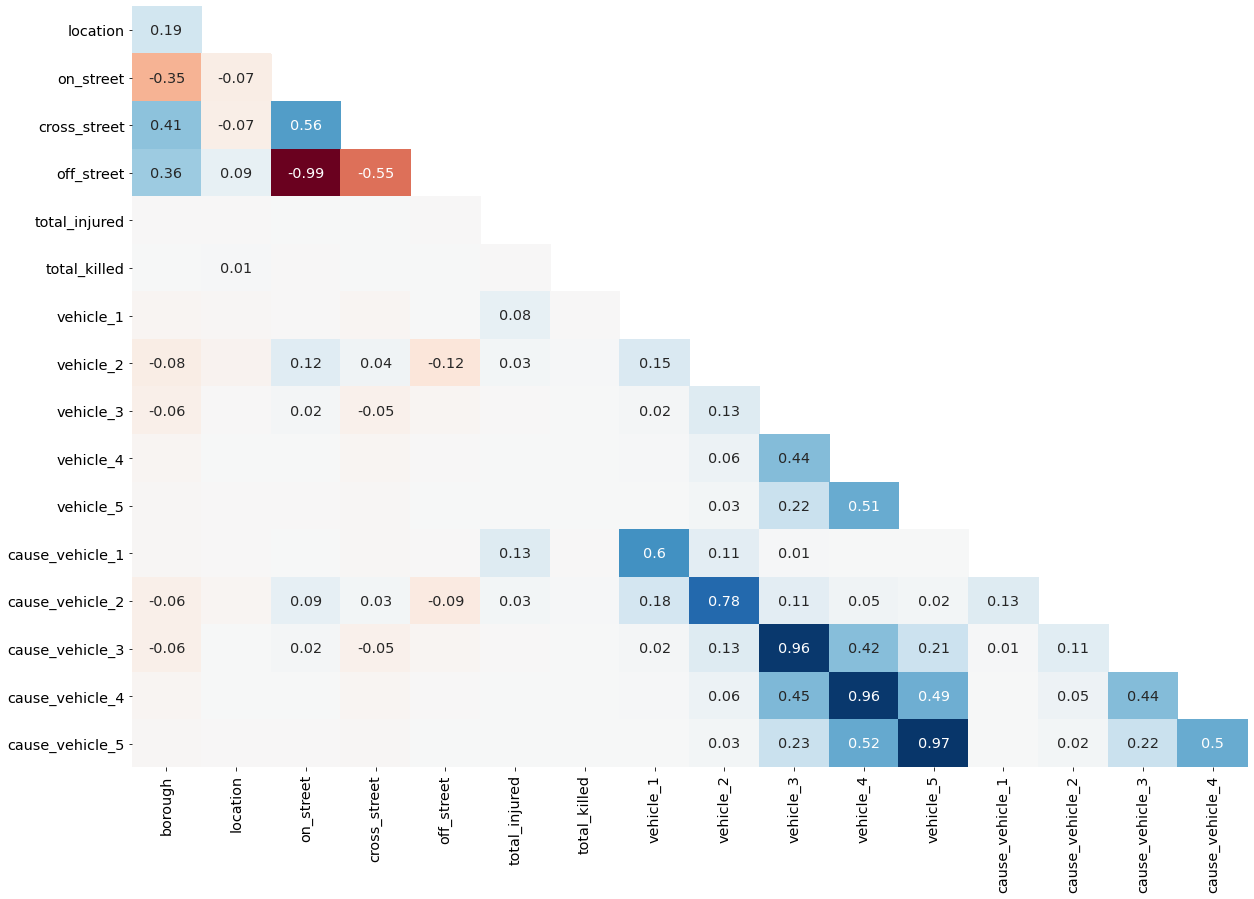

In [46]:
plot_null_correlations(mvc) 

In [47]:
vec = [v for v in mvc.columns if 'vehicle' in v] 

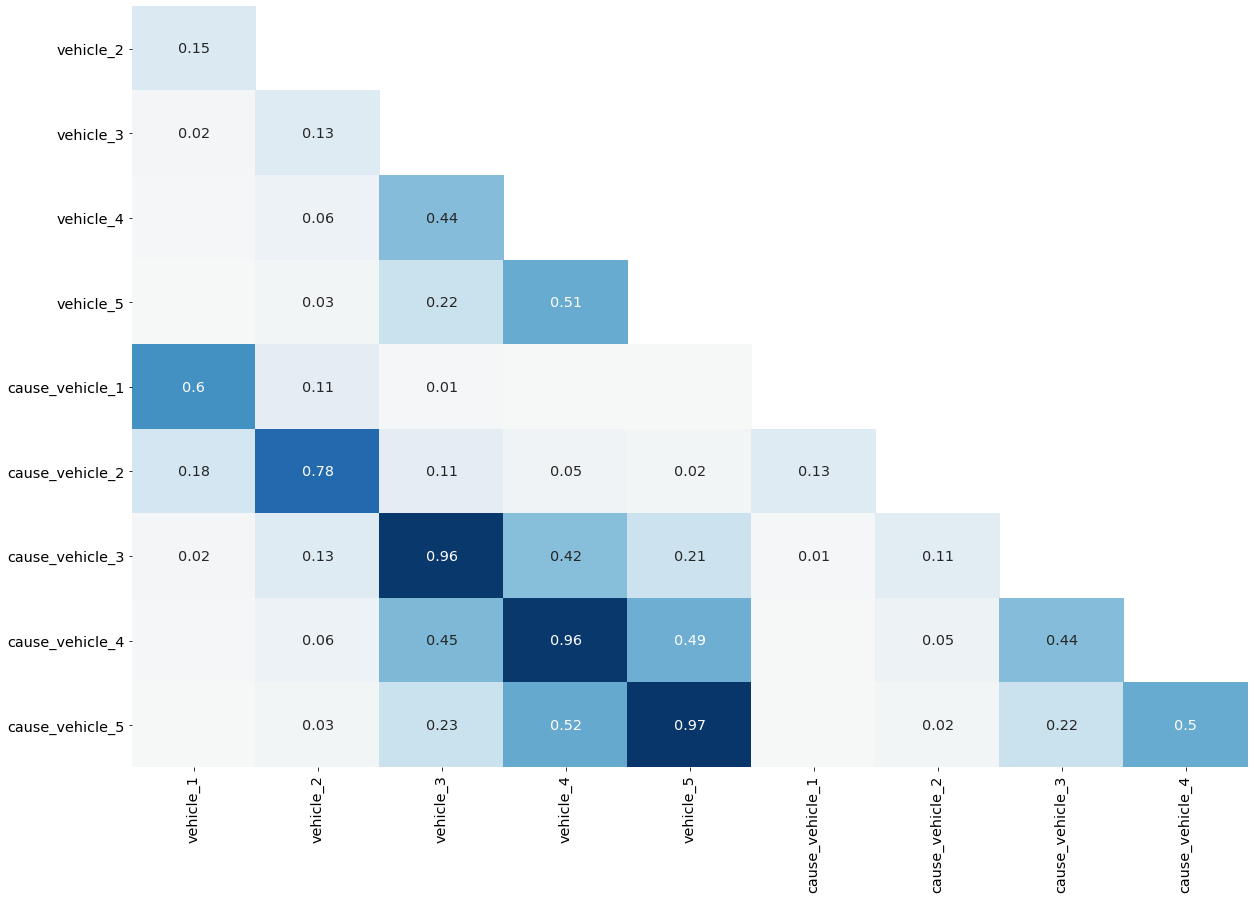

In [48]:
plot_null_correlations(mvc[vec]) 

### Analyzing Correlations in Missing Data

We outlined a diagonal strip of five squares in green that have a higher correlation than the rest. The pairs of column names that make up these five correlations are:
1. vehicle_1 and cause_vehicle_1
2. vehicle_2 and cause_vehicle_2
3. vehicle_3 and cause_vehicle_3
4. vehicle_4 and cause_vehicle_4
5. vehicle_5 and cause_vehicle_5

If you think about it, this makes sense. When a vehicle is in an accident, there is likely to be a cause, and vice-versa.

Let's explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:

1. The number of values where the vehicle is missing when the cause is not missing.
2. The number of values where the cause is missing when the vehicle is not missing.

The final structure of our dataframe will look like this:

### Instructions
We provided the start of the loop you are going to build, including code that generates each column name as strings: v_col and c_col

Add code to the body of the loop that will:
1. Count the number of rows where the v_col column is null and the c_col column is not null. Assign the result to v_null.
2. Count the number of rows where the c_col column is null and the v_col column is not null. Assign the result to c_null.
3. Append an item to the vc_null_data list. The item should be a list containing, in order: v, v_null, c_null.
4. Outside the loop, create a dataframe using the vc_null_data list of lists.
5. Use the columns parameter and the col_labels list to set the column names of the dataframe.
6. Assign the dataframe to vc_null_df.

In [49]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
     v_col = 'vehicle_{}'.format(v)
     c_col = 'cause_vehicle_{}'.format(v)
     v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
     c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
     vc_null_data.append([v,v_null,c_null])
pd.DataFrame(vc_null_data, columns = col_labels) 

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


### Finding the Most Common Values Across Multiple Columns

The analysis we did on the previously indicates that there are roughly 4,500 missing values across the 10 columns. The easiest option for handling these would be to drop the rows with missing values. This would mean losing almost 10% of the total data, which is something we ideally want to avoid.

A better option is to impute the data, like we did earlier. Because the data in these columns is text data, we can't perform a numeric calculation to impute missing data like we did with the injuries and killed columns.

One common option when imputing is to use the most common value to fill in data.

We've previously used the Series.value_counts() method to find the most common values in a single column. In this case, we want to find the most common values across multiple columns. In order to do this, we first need to convert our dataframe of multiple columns into one single column, and then we can use Series.value_counts() to count the items.

To convert a dataframe to a single column of values, we use the `DataFrame.stack()` method, which stacks a dataframe object into a Series object. Let's look at a diagram of how this works. We'll start with a simple dataframe with three columns containing words:

In [50]:
vc = {'A':['one', 'two', 'three'], 
      'B':['two', 'four', 'six'], 
      'C':['three', 'six', 'nine'] }

df = pd.DataFrame(vc, columns = ['A', 'B', 'C']) 
df

,A,B,C
0,one,two,three
1,two,four,six
2,three,six,nine


When we use `DataFrame.stack()`, the values become a series object, with the values from each row "stacked" on top of each other:

In [51]:
df_1 = df.stack()
df_1

0  A      one
   B      two
   C    three
1  A      two
   B     four
   C      six
2  A    three
   B      six
   C     nine
dtype: object

In [52]:
df_1.value_counts() 

three    2
two      2
six      2
one      1
nine     1
four     1
dtype: int64

In [53]:
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
cause.head()

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,Following Too Closely,Unspecified,NaN,NaN,NaN
3,Glare,Passing Too Closely,NaN,NaN,NaN
4,Turning Improperly,Unspecified,NaN,NaN,NaN


In [54]:
cause_1d = cause.stack()
print(cause_1d.head())

0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object


You may notice that the stacked version omits null values - this is fine, as we're just interested in the most common non-null values.

In [55]:
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
print(top10_causes)

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64


The most common non-null value for the cause columns is Unspecified, which presumably indicates that the officer reporting the collision was unable to determine the cause for that vehicle.

Let's use the same technique to identify the most common non-null value for the vehicle columns.

### Instructions
A list comprehension that identifies columns starting with the substring vehicle.
1. Create a dataframe containing only the columns from mvc, identified by the list comprehension v_cols.
2. Use DataFrame.stack() to stack the values from the dataframe into a single series object.
3. Use Series.value_counts() to count the unique values from the stacked series. Assign the first 10 values to top10_vehicles.

In [56]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]

In [57]:
v = mvc[v_cols] 
v.head()

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN
2,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,Sedan,Sedan,NaN,NaN,NaN
4,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [58]:
v_stack = v.stack()
v_stack.head()

0  vehicle_1                      PASSENGER VEHICLE
1  vehicle_1          SPORT UTILITY / STATION WAGON
   vehicle_2                                     DS
2  vehicle_1    Station Wagon/Sport Utility Vehicle
   vehicle_2                                  Sedan
dtype: object

In [59]:
v_stack_counts = v_stack.value_counts()
top10_vehicles = v_stack_counts.head(10 ) 

### Filling Unknown Values with a Placeholder

The top "cause" is an "Unspecified" placeholder. This is useful instead of a null value as it makes the distinction between a value that is missing because there were only a certain number of vehicles in the collision versus one that is because the contributing cause for a particular vehicle is unknown.

The vehicles columns don't have an equivalent, but we can still use the same technique. Here's the logic we'll need to do for each pair of vehicle/cause columns:

For values where the vehicle is null and the cause is non-null, set the vehicle to Unspecified.
For values where the cause is null and the vehicle is not-null, set the cause to Unspecified.
We can use Series.mask() to replace the values, just like we did earlier in the mission. Let's look at code to perform this for the vehicle_1 and vehicle_cause_1 columns:

In [60]:
# create a mask for each column
v_missing_mask = mvc['vehicle_1'].isnull() & mvc['cause_vehicle_1'].notnull()
c_missing_mask = mvc['cause_vehicle_1'].isnull() & mvc['vehicle_1'].notnull()
# replace the values matching the mask for each column
mvc['vehicle_1'] =  mvc['vehicle_1'].mask(v_missing_mask, "Unspecified")
mvc['cause_vehicle_1'] =  mvc['cause_vehicle_1'].mask(c_missing_mask, "Unspecified")

In [63]:
summarize_missing()

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [62]:
def summarize_missing():
    v_missing_data = []
    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)
        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
        v_missing_data.append([v, v_missing, c_missing])
    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)
summary_before = summarize_missing()
# for v in range(1,6):
#     v_col = 'vehicle_{}'.format(v)
#     c_col = 'cause_vehicle_{}'.format(v)

### Instructions
In addition to the helper function, we provided the start of the loop you are going to build, including code that generates each column name as a string.

1. Add code to the body of the loop that:
2. Creates a boolean mask for values where the vehicle column is null and the cause column is non-null.
3. Creates a boolean mask for values where the cause column is null and the vehicle column is non-null.
4. Uses the first boolean mask to fill matching values from the vehicle column with the string Unspecified.
4. Uses the second boolean mask to fill matching values from the cause column with the string Unspecified.
5. Outside the loop, use the summarize_missing() function to check that you have removed all matching values. Assign the result to summary_after.

In [64]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    
    mvc[v_col] = mvc[v_col].mask(v_mask, 'Unspecified') 
    mvc[c_col] = mvc[c_col].mask(c_mask, 'Unspecified') 

In [65]:
summary_after = summarize_missing() 
summary_after 

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


### Missing Data in the "Location" Columns

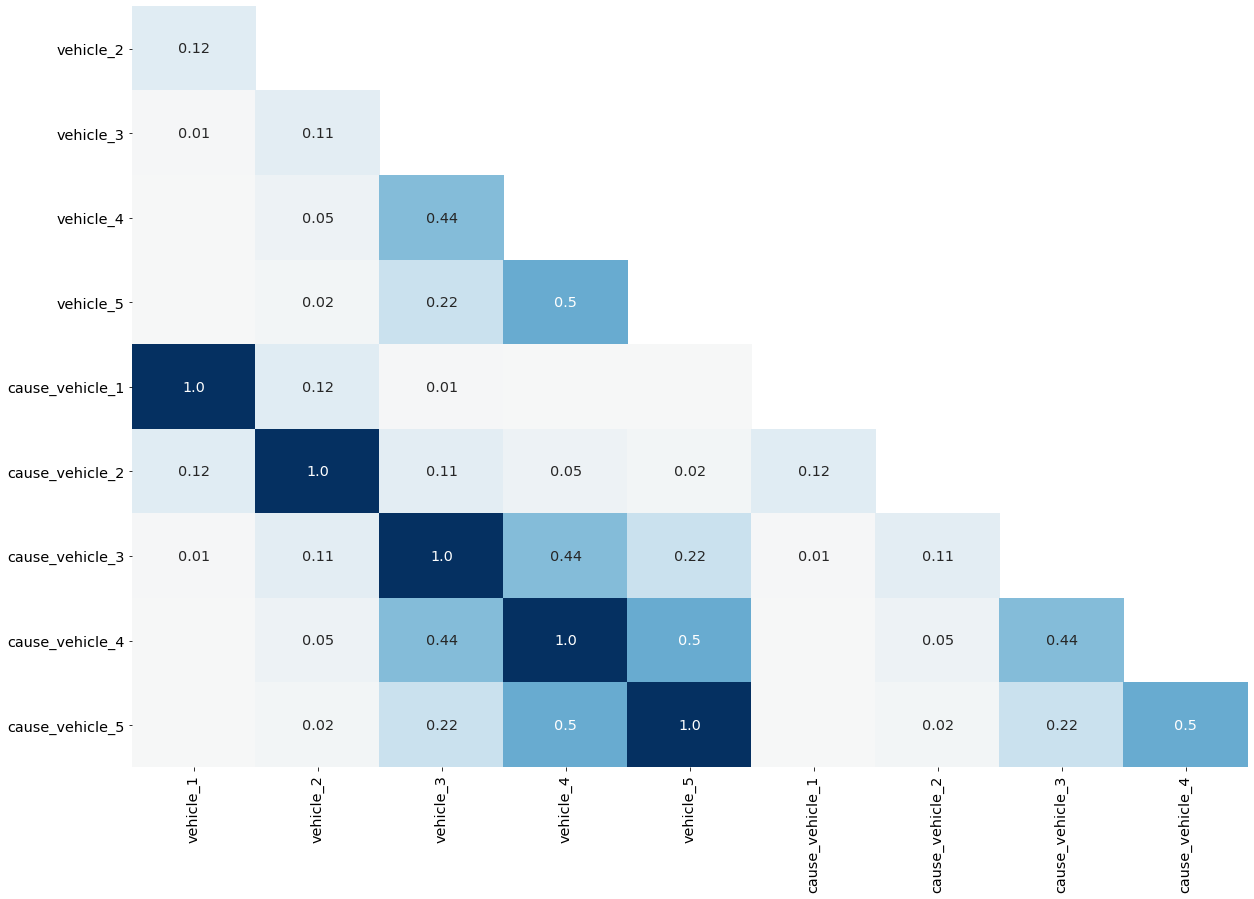

In [66]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

You can see the perfect correlation between each pair of vehicle/cause columns represented by 1.0 in each square, which means that there is a perfect relationship between the five pairs of vehicle/cause columns.

In [67]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [68]:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


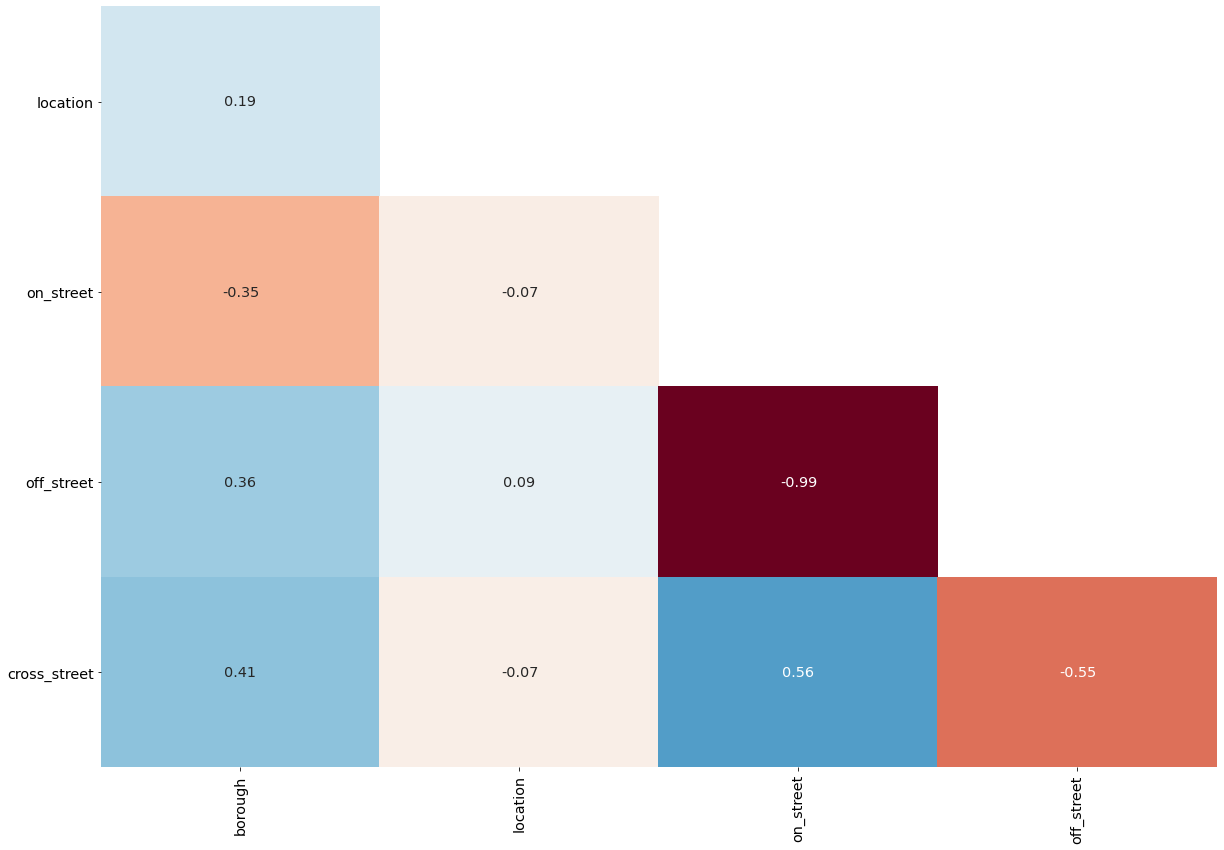

In [69]:
#These columns have a lot of missing values! Keep in mind that all of these five columns represent the same thing — the location of the collision. We can potentially use the non-null values to impute some of the null values.
#To see where we might be able to do this, let's look for correlations between the missing values:
plot_null_correlations(location_data)

None of these columns have strong correlations except for off_street and on_street which have a near perfect negative correlation. That means for almost every row that has a null value in one column, the other has a non-null value and vice-versa.

The final way we'll look at the null values in these columns is to plot a null matrix, but we'll sort the data first. This will gather some of the null and non-null values together and make patterns more obvious:

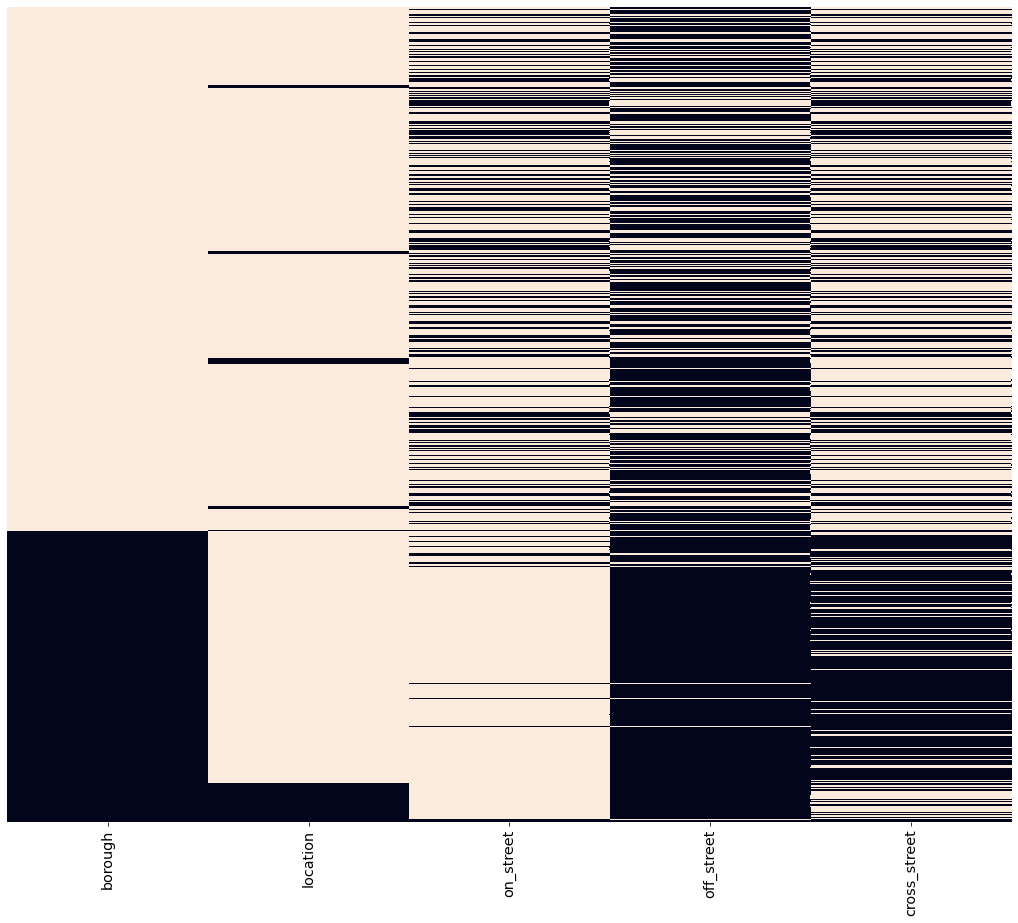

In [70]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

Let's make some observations about the missing values across these columns:
1. About two-thirds of rows have non-null values for borough, but of those values that are missing, most have non-null values for location and one or more of the street name columns.
2. Less than one-tenth of rows have missing values in the location column, but most of these have non-null values in one or more of the street name columns.
3. Most rows have a non-null value for either on_street or off_street, and some also have a value for cross_street.

Combined, this means that we will be able to impute a lot of the missing values by using the other columns in each row. To do this, we can use geolocation APIs that take either an address or location coordinates, and return information about that location.

### Imputing Location Data

For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.
For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.

In [71]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


The supplemental data has five columns from our original data set — the unique_key that identifies each collision, and four of the five location columns. The cross_street column is not included because the geocoding APIs we used don't include data on the nearest cross street to any single location.

Let's take a look at a null matrix for the supplemental data:

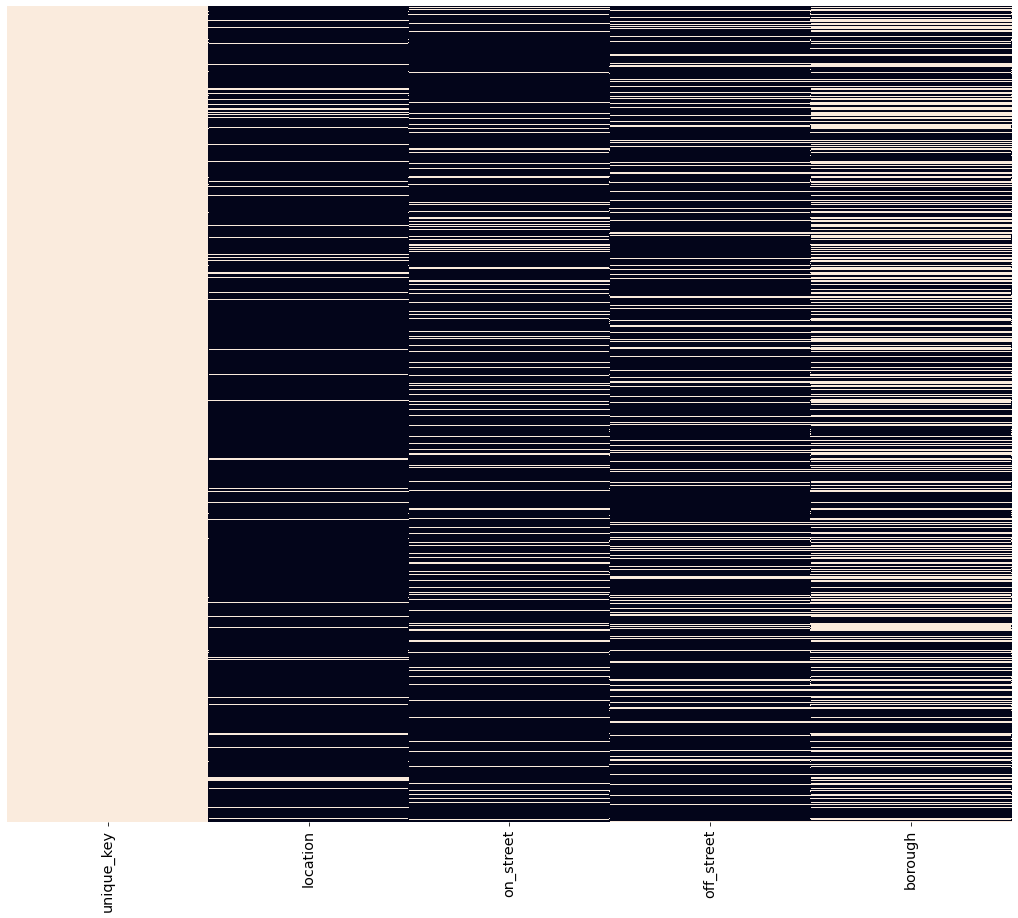

In [72]:
plot_null_matrix(sup_data)

Apart from the unique_key column, you'll notice that there are a lot more missing values than our main data set. This makes sense, as we didn't prepare supplemental data where the original data set had non-null values.

If the unique_key column in both the original and supplemental data has the same values in the same order, we'll be able to use Series.mask() to add our supplemental data to our original data. We can check this using the Series.equals() method:

In [73]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


### Instructions 
1. Loop over the column names in location_cols. In each iteration of the loop, use Series.mask() to replace values in the column in the mvc dataframe:

   A. The mask should represent whether the values in column in the mvc has a null value or not.
   
   B. Where the mask is true, the value should be replaced with the equivalent value in sup_data.
   
   
2. Calculate the number of null values across the location_cols columns in mvc after you adding the supplemental data. Assign the result to null_after.

In [74]:
sup_data = pd.read_csv('supplemental_data.csv')
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()

In [78]:
for names in location_cols:
    v_mask = mvc[names].isnull()
    mvc[names] = mvc[names].mask(v_mask,sup_data[names]) 
mvc[location_cols].isnull().sum() 

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64